In [231]:
from random import randint
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

main_file_path = 'OHIDataSet.csv'
data = pd.read_csv(main_file_path)


In [313]:
# Assume all answers are 'NA' if they're never assigned a value.
answers = ['NA'] * 19

In [314]:
data.head(7)

,scenario,goals,long_goal,dimension,region_id,region_name,value,Unnamed: 7
0,2012,AO,Artisanal opportunities,future,0,Global average,80.74,NaN
1,2012,AO,Artisanal opportunities,future,1,Cocos Islands,100.00,NaN
2,2012,AO,Artisanal opportunities,future,2,Christmas Island,100.00,NaN
3,2012,AO,Artisanal opportunities,future,3,Norfolk Island,100.00,NaN
4,2012,AO,Artisanal opportunities,future,4,Macquarie Island,100.00,NaN
5,2012,AO,Artisanal opportunities,future,5,New Caledonia,70.41,NaN
6,2012,AO,Artisanal opportunities,future,6,Vanuatu,49.91,NaN


**<font color='tomato'> Drop the "Unnamed: 7" column</font>**

In [315]:
data.drop('Unnamed: 7', axis=1, inplace=True)

In [316]:
data.head()

,scenario,goals,long_goal,dimension,region_id,region_name,value
0,2012,AO,Artisanal opportunities,future,0,Global average,80.74
1,2012,AO,Artisanal opportunities,future,1,Cocos Islands,100.00
2,2012,AO,Artisanal opportunities,future,2,Christmas Island,100.00
3,2012,AO,Artisanal opportunities,future,3,Norfolk Island,100.00
4,2012,AO,Artisanal opportunities,future,4,Macquarie Island,100.00


**<font color='tomato'> 2b-1</font>**

In [317]:
Q1 = False
if main_file_path.endswith(".json" or ".xml"):
    Q1 = True
else: Q1 = False
answers[0] = Q1
print(answers[0])

False


**<font color='tomato'> 2b-3 & 2b-6 & 2b-10</font>**

In [318]:
headers = ['scenario', 'goals', 'long_goal', 'dimension', 'region_id', 'region_name', 'value']
df_heads = list(data) 


# This next 'for' loop checks for answers to Questions 3 and 10. 

for x in range(0, 7):
    if (df_heads[x] in headers):
        Q6 = True
        
    else: 
        Q6 = False
    
# Check that two random elements from each column are of the same type.
def int_same_type(z):
    r1 = data.iloc[randint(0, data.shape[0]), z]
    r2 = data.iloc[randint(0, data.shape[0]), z]
    
    if(r1.dtype == r2.dtype):
        Q3 = True
    
    else: Q3 = False
    return Q3
        
def str_same_type(c):
    r1 = data.iloc[randint(0, data.shape[0]), c]
    r2 = data.iloc[randint(0, data.shape[0]), c]
    if(isinstance(r1, str) and isinstance(r2, str)):
        Q3 = True
    else: Q3 = False
    return Q3


if (int_same_type(0) and int_same_type(4) and int_same_type(6) == True):
    if (str_same_type(1) and str_same_type(2) and str_same_type(3) and str_same_type(5) == True):
        Q3 = True
    

answers[2] = Q3
answers[5] = Q6
    
print(answers)

   

[False, 'NA', True, 'NA', 'NA', True, 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA']


**<font color='tomato'> 2b-12</font>**

In [321]:
# Sift through the data, checking that each 
Q12 = False

#for v in range(0, 2):      Scans through all 7 columns instead of only the first one, was very slow to run though.
for x in range(0, data.shape[0]):
    if (pd.Series(data.iloc[x,0]).is_unique):
        Q12 = True
        
    
        
        
        
answers[11] = Q12
print(answers)

[False, 'NA', True, 'NA', 'NA', True, 'NA', 'NA', 'NA', 'NA', 'NA', True, 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA']


In [322]:
counter_T = answers.count(True)
counter_F = answers.count(False)
counter_NA = answers.count('NA')
counter_IDK = answers.count('IDK')
        

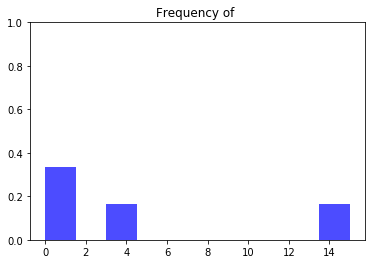

In [323]:

x = [counter_T, counter_F, counter_NA, counter_IDK]
labels = ['True', 'False', 'N/A', "I Don't Know"]
axis = plt.gca()
axis.set_ylim([0, 1])

plt.title('Frequency of ')
n, bins, patches = plt.hist(x, 10, density=True, facecolor='b', alpha=.7)

Text(0.5,1,'Possible Answers')

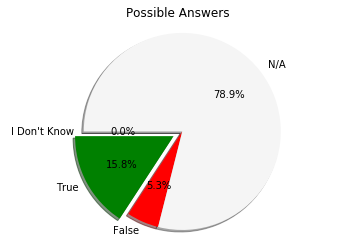

In [324]:
size = sum(x)

colours = ['green', 'red','whitesmoke', 'black']


plt.pie(x, explode=(0.1, 0, 0, 0), labels=labels, colors=colours, autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title('Possible Answers')